In [76]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns            
from sklearn.linear_model import LinearRegression
%matplotlib inline


## 1. Предобработка данных 

In [77]:
df=pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/advertising.csv')  # подгружаем табличку 
print('Размер выборки:', df.shape)                          # смотрим на её размеры 
df.head( ) # Смотрим что лежит в табличке 

Размер выборки: (200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [78]:
df.isnull().sum()  # посмотрим на то есть ли в переменных пропуски

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [79]:
del(df['Unnamed: 0']) # удалим служебную информацию


## 2. Для расчета корреляции между стоимостью рекламы и продажами построим корреляционную матрицу .

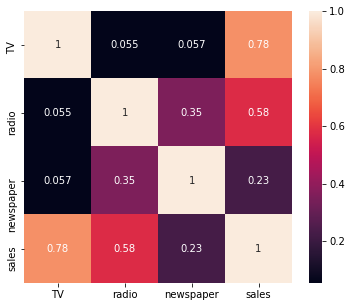

In [80]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True);

Матрица показывает :
        

значимую корреляцию между TV и sales =0.78

слабую корреляцию между radio и sales =0.58

 незначительную корреляцию между newspaper и sales =0.23

## 3. Линейная регрессия

In [81]:
# Вспомогательная функция 
def model_to_string(model, labels, precision=2):
    model_str = "{} = ".format(labels[-1])
    for z in range(len(labels) - 1):
        model_str += "{} * {} + ".format(round(model.coef_.flatten()[z], precision), labels[z])
    model_str += "{}".format(round(model.intercept_[0], precision))
    return model_str

### 3.1 Регресивная модель между  TV и sales 

In [82]:
X=df[["TV"]]
y=df[["sales"]]

(0.0, 28.27)

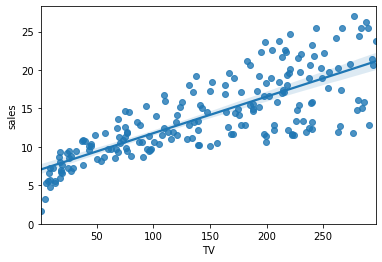

In [83]:
sns.regplot(x="TV", y="sales", data=df)
plt.ylim(0,)

In [84]:
# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X=X, y=y)



LinearRegression()

[[0.04753664]]
[7.03259355]


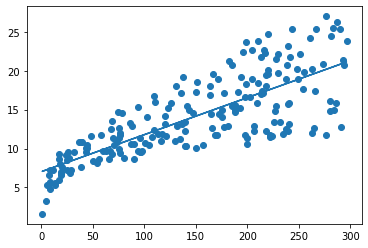

In [85]:
print(model_regression.coef_)
print(model_regression.intercept_)

regression_line_points = model_regression.predict(X=X)
plt.scatter(df[["TV"]], df[["sales"]])
plt.plot(X, regression_line_points)

plt.show()

In [86]:
labels =['TV',  'sales']
print(model_to_string(model_regression, labels))

sales = 0.05 * TV + 7.03


### 3.2 Регресивная модель между radio и sales

(0.0, 28.27)

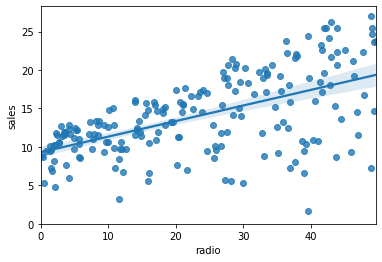

In [87]:
X=df[["radio"]]
y=df[["sales"]]

sns.regplot(x="radio", y="sales", data=df)
plt.ylim(0,)

[[0.20249578]]
[9.3116381]


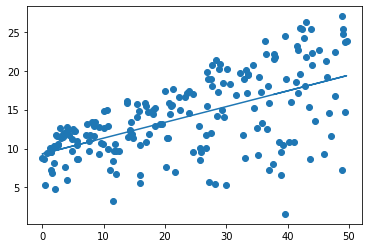

sales = 0.2 * radio + 9.31


In [88]:

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X=X, y=y)


print(model_regression.coef_)
print(model_regression.intercept_)

regression_line_points = model_regression.predict(X=X)
plt.scatter(df[["radio"]], df[["sales"]])
plt.plot(X, regression_line_points)

plt.show()


labels =['radio',  'sales']
print(model_to_string(model_regression, labels))


### 3.3 Регресивная модель между newspaper и sales

(0.0, 28.27)

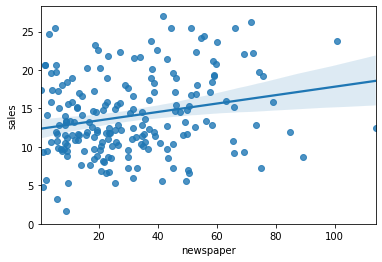

In [89]:
X=df[["newspaper"]]
y=df[["sales"]]

sns.regplot(x="newspaper", y="sales", data=df)
plt.ylim(0,)

[[0.0546931]]
[12.35140707]


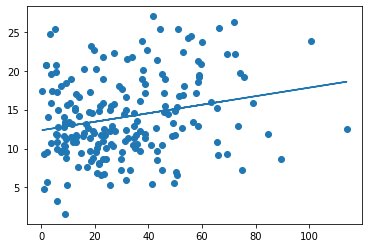

sales = 0.05 * newspaper + 12.35


In [90]:

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X=X, y=y)


print(model_regression.coef_)
print(model_regression.intercept_)

regression_line_points = model_regression.predict(X=X)
plt.scatter(df[["newspaper"]], df[["sales"]])
plt.plot(X, regression_line_points)

plt.show()


labels =['newspaper',  'sales']
print(model_to_string(model_regression, labels))


### 3.4 Регресивная модель между  TV, radio, newspaper и sales

In [93]:

def model_to_string(model, labels, precision=4):
    model_str = "{} = ".format(labels[-1])
    for z in range(len(labels) - 1):
        model_str += "{} * {} + ".format(round(model.coef_.flatten()[z], precision), labels[z])
    model_str += "{}".format(round(model.intercept_[0], precision))
    return model_str


advertising_data = pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/advertising.csv', index_col=0)
print(advertising_data)

ad_data = advertising_data[["TV", "radio", "newspaper"]]
sales_data = advertising_data[["sales"]]

linear_regression = linear_models.LinearRegression()
linear_regression.fit(ad_data, sales_data)

labels = advertising_data.columns.values
print(model_to_string(linear_regression, labels))

        TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]
sales = 0.0458 * TV + 0.1885 * radio + -0.001 * newspaper + 2.9389


### 4 Вывод

  Если анализировать по каждому направлению рекламу отдельно коэфициенты выглядят незначительно больше . Также совокупный анализ показал почти нулевую эффективность рекламы в направлении newspaper.
  
  Самая эффективная реклама на TV, потом radio и не эффективность newspaper.
  